# Central Pivot Range (CPR)

https://www.tradingview.com/script/EGsBWBpe-SD-Developing-Central-Pivot-Range/

https://pivotboss.com/2010/05/31/a-quick-guide-to-the-pivot-range/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [3]:
df['Pivot'] = (df['High'] + df['Low'] + df['Adj Close']) / 3.0
df['BC'] = (df['High'] + df['Low']) / 2.0
df['TC'] = (df['Pivot'] - df['BC']) + df['Pivot']

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Pivot,BC,TC
Date,,,,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900,169.753962,170.779999,168.727926
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900,171.394226,173.255005,169.533447
2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600,171.333837,172.775002,169.892673
2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000,172.929794,174.209999,171.649590
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800,173.092194,174.769997,171.414391


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Pivot,BC,TC
Date,,,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,145.090836,37169200,147.743612,149.069999,146.417224
2018-12-26,148.300003,157.229996,146.720001,157.169998,155.308350,58582500,153.086116,151.974998,154.197233
2018-12-27,155.839996,156.770004,150.070007,156.149994,154.300446,53117100,153.713486,153.420006,154.006966
2018-12-28,157.500000,158.520004,154.550003,156.229996,154.379486,42291400,155.816498,156.535004,155.097992
2018-12-31,158.529999,159.360001,156.479996,157.740005,155.871613,35003500,157.237203,157.919999,156.554408


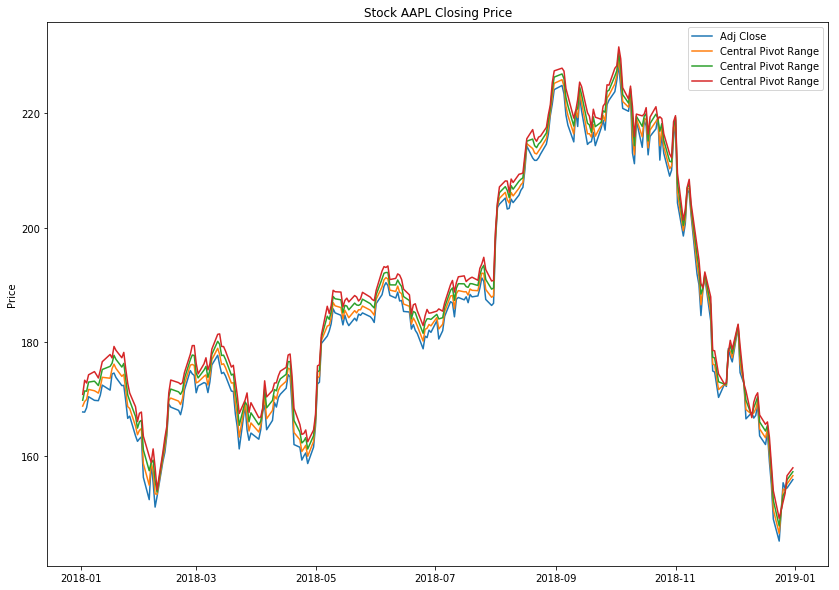

In [7]:
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.plot(df['TC'], label='Central Pivot Range')
plt.plot(df['Pivot'], label='Central Pivot Range')
plt.plot(df['BC'], label='Central Pivot Range')
plt.title('Stock '+ symbol +' Closing Price')
plt.ylabel('Price')
plt.legend(loc='best')

## Candlestick with Central Pivot Range (CPR)

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pivot,BC,TC,VolumePositive
0,736696.0,170.160004,172.300003,169.259995,172.259995,167.701889,25555900,169.753962,170.779999,168.727926,False
1,736697.0,172.529999,174.550003,171.960007,172.229996,167.672668,29517900,171.394226,173.255005,169.533447,False
2,736698.0,172.539993,173.470001,172.080002,173.029999,168.451508,22434600,171.333837,172.775002,169.892673,False
3,736699.0,173.440002,175.369995,173.050003,175.000000,170.369385,23660000,172.929794,174.209999,171.649590,False
4,736702.0,174.350006,175.610001,173.929993,174.350006,169.736588,20567800,173.092194,174.769997,171.414391,False


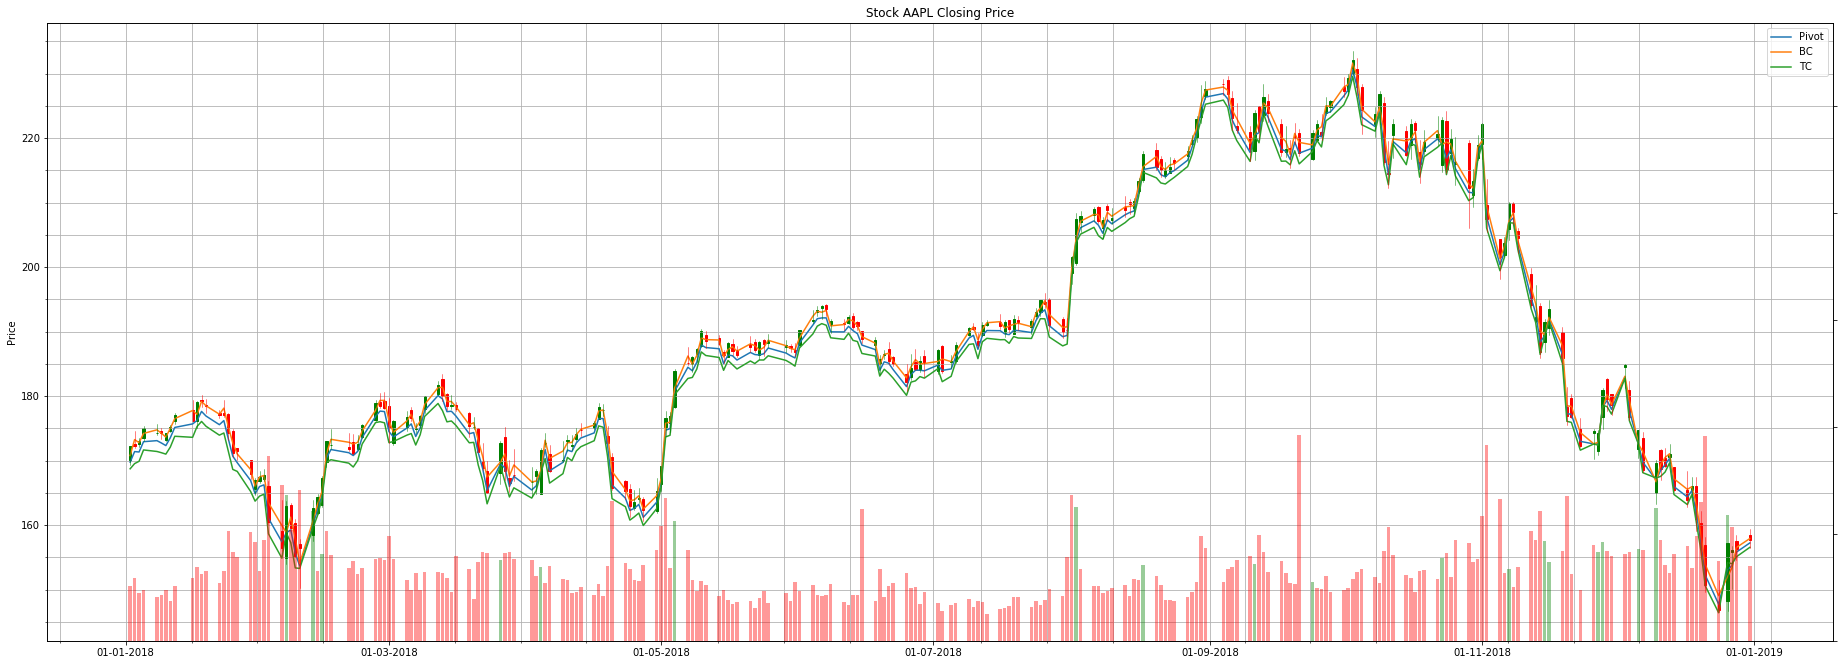

In [21]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(32,25))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Pivot'], label='Pivot')
ax1.plot(df['BC'], label='BC')
ax1.plot(df['TC'], label='TC')
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')